# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
# Importing Keras library
import keras

Using TensorFlow backend.


In [0]:
# Import numpy which is fundamental package for scientific computing in python
import numpy as np
# Using sequential model from models available in keras
from keras.models import Sequential
# Importing keras layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# Importing utilities which transform data
from keras.utils import np_utils
# Importing mnist from dataset for image processing
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Loading train and test data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


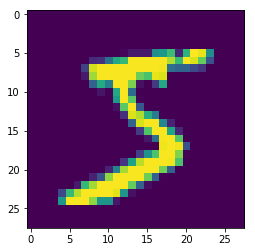

In [4]:
# Printing train data shape
print (X_train.shape)
# Matplotlib is used for ploting graph
from matplotlib import pyplot as plt
# Ploting image under code cell
%matplotlib inline
# Ploted image of train[0] from train data set
plt.imshow(X_train[0])

In [0]:
# Reshaping for train and test data for processing
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Conversion of train and test data set
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# output of train data array and its data type
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Output of train data set array of dimension 10
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
# Using Activation function from keras layers
from keras.layers import Activation
# Defining sequential model
model = Sequential()
# Using convolution and Max Pooling operation on input image
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 RF-3x3
model.add(MaxPooling2D(2,2)) # 13 RF-6x6
model.add(Convolution2D(16, 3, 3, activation='relu')) # 11 RF-8x8
model.add(Convolution2D(32, 3, 3, activation='relu')) # 9  RF-10x10
model.add(Convolution2D(10, 3, 3, activation='relu')) # 7  RF-12x12
model.add(Convolution2D(10, 7))
model.add(Convolution2D(10, 1))
# using flatten to convert multidimension array into 1-d array
model.add(Flatten())
# Using softmax activation function for probability distribution
model.add(Activation('softmax'))
# Print Model summary 
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 10)          2890      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 10)          4910      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)          110       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# fit model for training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.2074 - acc: 0.9368 - val_loss: 0.0604 - val_acc: 0.9815
Epoch 2/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0640 - acc: 0.9807 - val_loss: 0.0468 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0478 - acc: 0.9849 - val_loss: 0.0358 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0396 - acc: 0.9878 - val_loss: 0.0360 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0316 - acc: 0.9903 - val_loss: 0.0255 - val_acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0270 - acc: 0.9915 - val_loss: 0.0279 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0238 - acc: 0.9925 - val_loss: 0.

In [18]:
# evaluating and printing model score
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 0.03252425459066674
Accuracy: 0.993


In [0]:
# Predict test data from test data
y_pred = model.predict(X_test)

In [20]:
# Print predicted and tested data
print(y_pred[:9])
print(y_test[:9])

[[7.9654964e-22 8.5663142e-17 3.3220483e-13 5.7572342e-16 8.9367781e-28
  9.4882541e-20 2.6385541e-28 1.0000000e+00 2.2363842e-20 2.5088917e-16]
 [7.8431178e-20 1.6412082e-17 1.0000000e+00 1.7766017e-24 6.2551826e-26
  1.5005281e-26 2.8511034e-16 1.3243441e-24 2.8270467e-18 3.8553805e-27]
 [4.2689154e-13 1.0000000e+00 3.0038655e-10 5.9145545e-15 1.1432474e-08
  5.5835636e-12 5.4654812e-11 6.4829897e-09 4.5731700e-11 2.4910480e-13]
 [1.0000000e+00 2.5503119e-20 1.5711293e-13 2.1860196e-21 7.0724039e-21
  6.7447394e-17 1.0412090e-11 7.2783073e-21 2.3625763e-15 1.7274209e-14]
 [1.2222017e-21 6.7635253e-16 2.2325264e-17 1.1721264e-18 1.0000000e+00
  1.3581450e-19 2.9449953e-14 1.6459214e-19 6.6831794e-14 2.5416922e-09]
 [6.4907568e-13 9.9999964e-01 1.4662607e-10 2.3236643e-18 1.9728175e-10
  7.3906039e-15 4.3908792e-12 3.5196507e-07 9.6644145e-13 5.6433608e-15]
 [7.7481138e-33 9.2679271e-13 8.7884244e-22 1.1410769e-24 1.0000000e+00
  5.9797338e-22 7.5994182e-24 8.7879149e-16 6.5811922e-12 

In [0]:
# Name for layer to visualise
layer_dict = dict([(layer.name, layer) for layer in model.layers])

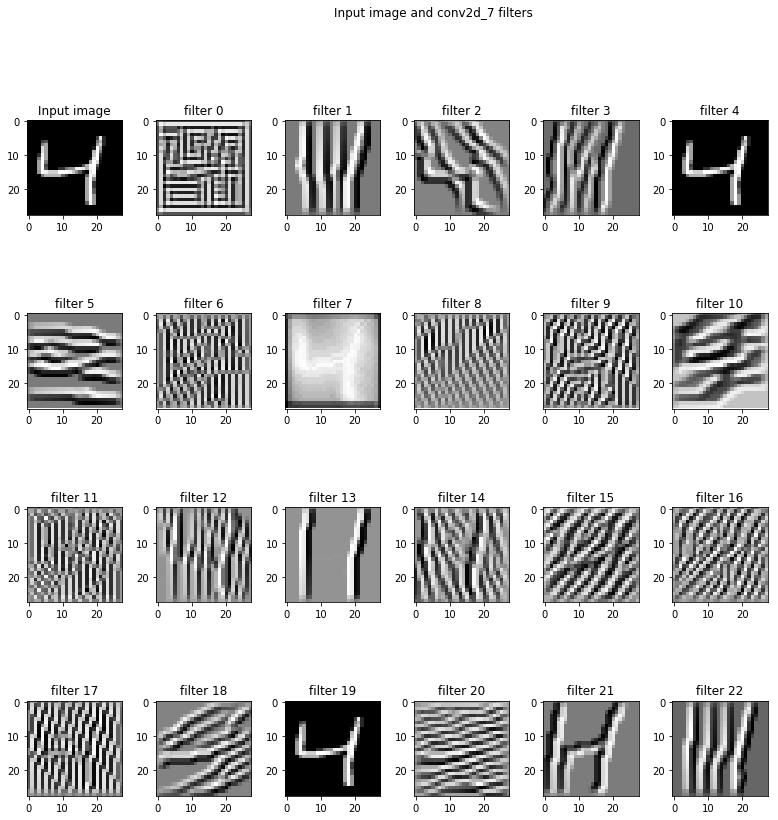

In [22]:
# Importing libraries and modules
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()